### Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
df = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\car_price.csv')

In [3]:
df.head(2)

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats


#### Drop the Non significant feature

In [4]:
df.drop('Unnamed: 0' , axis =1 ,inplace = True)

In [5]:
df.head(2)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats


#### shape

In [6]:
df.shape

(5512, 9)

#### Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5512 non-null   object
 1   car_prices_in_rupee  5512 non-null   object
 2   kms_driven           5512 non-null   object
 3   fuel_type            5512 non-null   object
 4   transmission         5512 non-null   object
 5   ownership            5512 non-null   object
 6   manufacture          5512 non-null   int64 
 7   engine               5512 non-null   object
 8   Seats                5512 non-null   object
dtypes: int64(1), object(8)
memory usage: 387.7+ KB


## Exploratory Data Analysis

In [8]:
# this function is for split the car name on basis on brand and model
def get_data_analysis_columns(data):
    
    analysis = data.str.findall('[a-zA-z]+',)
    analysis = [x[0] for x in analysis if x is not np.nan]
    
    return set(analysis)
    
# brands
def get_brand(s):
    
    return s.split()[0]

#models
def get_model(s):
    
    return s.split()[1]

In [9]:
df['model'] = df['car_name'].apply(get_model)
df['brand'] = df['car_name'].apply(get_brand)

In [10]:
df.head(1)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,model,brand
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,Compass,Jeep


#### Make Car_prices in rupee in proper format

In [11]:
df['car_prices_in_rupee'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5512 entries, 0 to 5511
Series name: car_prices_in_rupee
Non-Null Count  Dtype 
--------------  ----- 
5512 non-null   object
dtypes: object(1)
memory usage: 43.2+ KB


In [12]:
def new_price_converted(s):
    
    if type(s) == str:
        s = s.lower()
        
        if 'lakh' in s:
            
            s = s.strip('lakh')
            s = float(s)*100000
            
            
        elif 'crore' in s:
            s = s.strip('crore')
            s = float(s) * 1000000
            
            
        else:
            
            s = ''.join(s.split(','))
            
            s = float(s)
            
        return s

In [13]:
df['car_price_converted'] = df['car_prices_in_rupee'].apply(new_price_converted)

In [14]:
df['car_price_converted'].isnull().sum()

0

In [15]:
df.head(2)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,model,brand,car_price_converted
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,Compass,Jeep,1003000.0
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,Duster,Renault,1283000.0


In [16]:
#df.to_csv('C:\\Users\\Lenovo\Desktop\\t.csv')

#### Kms_driven in proper format

In [17]:
df['kms_driven'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5512 entries, 0 to 5511
Series name: kms_driven
Non-Null Count  Dtype 
--------------  ----- 
5512 non-null   object
dtypes: object(1)
memory usage: 43.2+ KB


In [18]:
df['kms_driven'].isnull().sum()

0

In [19]:
df['kms_driven_converted'] = df['kms_driven'].str.replace('[^\d.]' ,'', regex = True)

In [20]:
df['kms_driven_converted']  = pd.to_numeric(df['kms_driven_converted'])

In [21]:
df['kms_driven_converted'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5512 entries, 0 to 5511
Series name: kms_driven_converted
Non-Null Count  Dtype
--------------  -----
5512 non-null   int64
dtypes: int64(1)
memory usage: 43.2 KB


In [22]:
df.head(2)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,model,brand,car_price_converted,kms_driven_converted
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,Compass,Jeep,1003000.0,86226
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,Duster,Renault,1283000.0,13248


#### Engine in proper format

In [23]:
df['engine'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5512 entries, 0 to 5511
Series name: engine
Non-Null Count  Dtype 
--------------  ----- 
5512 non-null   object
dtypes: object(1)
memory usage: 43.2+ KB


In [24]:
df['engine_converted'] = df['engine'].str.strip('cc').astype('float')

#### Make Seats into proper format

In [25]:
df['seats_converted'] = df['Seats'].str.strip('Seats').astype('float')

In [26]:
df.head(1)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,model,brand,car_price_converted,kms_driven_converted,engine_converted,seats_converted
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,Compass,Jeep,1003000.0,86226,1956.0,5.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_name              5512 non-null   object 
 1   car_prices_in_rupee   5512 non-null   object 
 2   kms_driven            5512 non-null   object 
 3   fuel_type             5512 non-null   object 
 4   transmission          5512 non-null   object 
 5   ownership             5512 non-null   object 
 6   manufacture           5512 non-null   int64  
 7   engine                5512 non-null   object 
 8   Seats                 5512 non-null   object 
 9   model                 5512 non-null   object 
 10  brand                 5512 non-null   object 
 11  car_price_converted   5512 non-null   float64
 12  kms_driven_converted  5512 non-null   int64  
 13  engine_converted      5512 non-null   float64
 14  seats_converted       5512 non-null   float64
dtypes: float64(3), int64(

## Data Preprocessing

#### 1. Handling missing values

In [28]:
df.isnull().sum()

car_name                0
car_prices_in_rupee     0
kms_driven              0
fuel_type               0
transmission            0
ownership               0
manufacture             0
engine                  0
Seats                   0
model                   0
brand                   0
car_price_converted     0
kms_driven_converted    0
engine_converted        0
seats_converted         0
dtype: int64

In [29]:
df.describe(include = 'object')

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,model,brand
count,5512,5512,5512,5512,5512,5512,5512,5512,5512,5512
unique,1896,1300,2610,5,2,6,139,6,230,32
top,Maruti Alto 800 LXI,4.50 Lakh,"80,000 kms",Petrol,Manual,1st Owner,1197 cc,5 Seats,Swift,Maruti
freq,53,62,163,2967,3962,3736,714,4673,388,1389


In [30]:
df.head(2)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,model,brand,car_price_converted,kms_driven_converted,engine_converted,seats_converted
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,Compass,Jeep,1003000.0,86226,1956.0,5.0
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,Duster,Renault,1283000.0,13248,1330.0,5.0


### 2.Handling characters

##### LabelEncoding

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
label = LabelEncoder()

In [33]:
df['fuel_type']  = label.fit_transform(df['fuel_type'])

In [34]:
df['transmission'] =label.fit_transform(df['transmission'])

In [35]:
df['brand'] = label.fit_transform(df['brand'])

In [36]:
df['model'] = label.fit_transform(df['model'])

In [37]:
df['ownership'] = label.fit_transform(df['ownership'])

In [38]:
df.head(2)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,model,brand,car_price_converted,kms_driven_converted,engine_converted,seats_converted
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",1,1,1,2017,1956 cc,5 Seats,47,12,1003000.0,86226,1956.0,5.0
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",4,0,1,2021,1330 cc,5 Seats,54,26,1283000.0,13248,1330.0,5.0


### 3. Handling the outliers

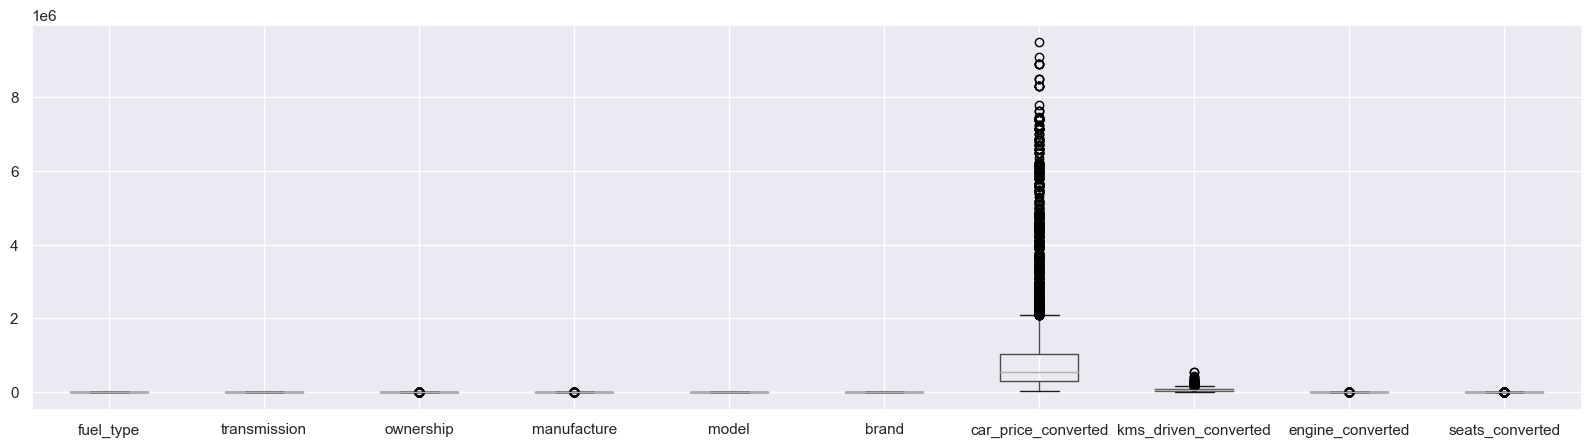

In [39]:
plt.figure(figsize = (20,5))
df.boxplot()
plt.show()

In [40]:
for i in list(df.select_dtypes(exclude = 'object').columns)[:]:
    print(i)

fuel_type
transmission
ownership
manufacture
model
brand
car_price_converted
kms_driven_converted
engine_converted
seats_converted


##### IQR Kms_driven

In [41]:
Q1_kms = df['kms_driven_converted'].quantile(0.25)
Q2_kms = df['kms_driven_converted'].quantile(0.50)
Q3_kms = df['kms_driven_converted'].quantile(0.75)

IQR_kms = Q3_kms - Q1_kms

upper_limit_kms = Q3_kms + (1.5 * IQR_kms)
lower_limit_kms = Q1_kms - (1.5 * IQR_kms)

print('Q1_kms :' , Q1_kms)
print('Q2_kms :' , Q2_kms)
print('Q3_kms :' , Q3_kms)

print('IQR_kms :' , IQR_kms)

print('Upper limit kms :' , upper_limit_kms)
print('Lower limit kms :' , lower_limit_kms)


Q1_kms : 33151.75
Q2_kms : 59000.0
Q3_kms : 84265.25
IQR_kms : 51113.5
Upper limit kms : 160935.5
Lower limit kms : -43518.5


#### capping kms_driven

In [42]:
df['kms_driven_converted'] = np.where(df['kms_driven_converted'] > upper_limit_kms , upper_limit_kms , 
         np.where(df['kms_driven_converted'] < lower_limit_kms , lower_limit_kms , df['kms_driven_converted']))

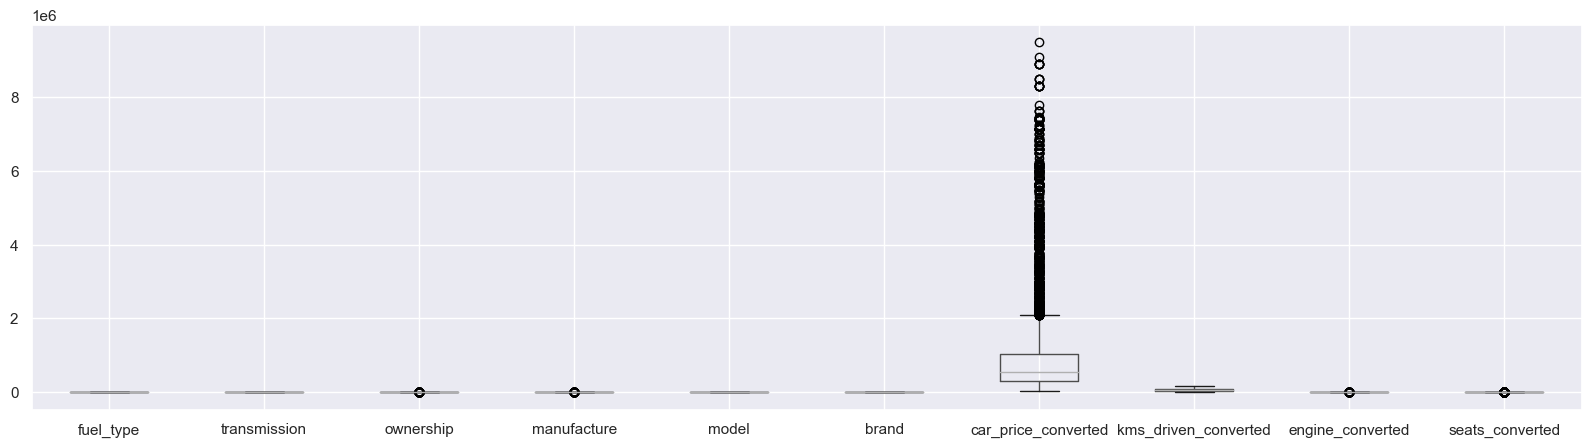

In [43]:
plt.figure(figsize = (20,5))
df.boxplot()
plt.show()

### Drop the unwanted features

In [44]:
df.drop(['car_name' , 'car_prices_in_rupee' ,'kms_driven','engine','Seats' ] , axis = 1 , inplace = True)

#### .4 Feature Scaling

In [45]:
df.head(1)

,fuel_type,transmission,ownership,manufacture,model,brand,car_price_converted,kms_driven_converted,engine_converted,seats_converted
0,1,1,1,2017,47,12,1003000.0,86226.0,1956.0,5.0


In [46]:
x = df.iloc[: , [0,1,2,3,4,5,7,8,9]]
y = df.iloc[: , -4]

In [47]:
x.head(2)

,fuel_type,transmission,ownership,manufacture,model,brand,kms_driven_converted,engine_converted,seats_converted
0,1,1,1,2017,47,12,86226.0,1956.0,5.0
1,4,0,1,2021,54,26,13248.0,1330.0,5.0


In [48]:
y.head(2)

0    1003000.0
1    1283000.0
Name: car_price_converted, dtype: float64

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
scaled_x = scaler.fit_transform(x)

In [52]:
scaled_x = pd.DataFrame(scaled_x , columns = x.columns)

In [53]:
scaled_x.head(2)

,fuel_type,transmission,ownership,manufacture,model,brand,kms_driven_converted,engine_converted,seats_converted
0,-1.068243,0.625473,-0.599986,0.393228,-0.961147,-0.425853,0.657683,0.731579,-0.348225
1,0.918538,-1.598790,-0.599986,1.411657,-0.864926,1.296126,-1.327744,-0.349299,-0.348225


### Correlation

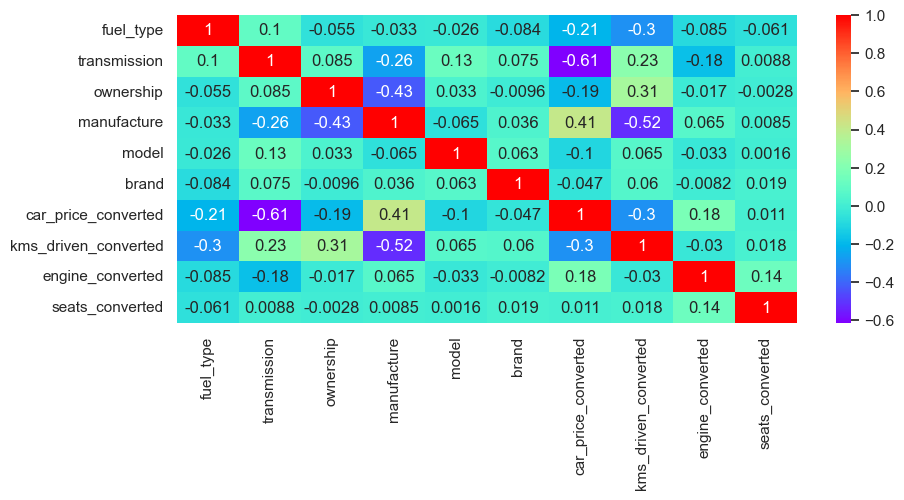

In [54]:
plt.figure(figsize = (10,4))
sns.heatmap(df.corr() , annot = True , cmap = 'rainbow' , cbar = True )
plt.show()

#### Insights : By visualizing heatmap , we get analysis there is  no multicolliearity

In [55]:
variable = scaled_x

In [56]:
vif = pd.DataFrame()

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
vif['variance inflation factor'] = [variance_inflation_factor(variable , i) for i in range(x.shape[1])]

vif['Feature'] = x.columns

In [59]:
vif

,variance inflation factor,Feature
0,1.204718,fuel_type
1,1.161787,transmission
2,1.244657,ownership
3,1.669424,manufacture
4,1.022354,model
5,1.023396,brand
6,1.662958,kms_driven_converted
7,1.056832,engine_converted
8,1.023111,seats_converted


#### Insights : By visualizing VIF , we get analysis there is  no multicolliearity. all values of variables is less than 5 

#### Train_test_split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 12)

In [62]:
print(x_train.shape ,x_test.shape , y_train.shape , y_test.shape)

(4134, 9) (1378, 9) (4134,) (1378,)


### Model

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
regression = LinearRegression()

In [65]:
regression.fit(x_train , y_train)

LinearRegression()

In [66]:
y_train_pred= regression.predict(x_train)

In [67]:
y_train_pred

array([1045674.86947662,   49245.53928059,  627798.86947834, ...,
       2595295.19708793,  599032.29867384, 2527364.96591823])

In [68]:
from sklearn.metrics import r2_score

In [69]:
training_accuracy = r2_score(y_train , y_train_pred)

In [70]:
training_accuracy 

0.4906361149642988

#### Training Accuracy of multiple linear Regression is 0.4906361149642988

In [71]:
regression.fit(x_test , y_test)

LinearRegression()

In [72]:
y_test_pred = regression.predict(x_test)

In [73]:
testing_accuracy = r2_score(y_test , y_test_pred)

In [74]:
testing_accuracy

0.46958197859444717

#### Testing Accuracy of multiple linear Regression is 0.46958197859444717

## OLS Model

In [75]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [76]:
ols = smf.OLS(endog = y_train , exog = x_train).fit()

In [77]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     car_price_converted   R-squared (uncentered):                   0.664
Model:                             OLS   Adj. R-squared (uncentered):              0.663
Method:                  Least Squares   F-statistic:                              905.5
Date:                 Tue, 02 Apr 2024   Prob (F-statistic):                        0.00
Time:                         20:17:23   Log-Likelihood:                         -62972.
No. Observations:                 4134   AIC:                                  1.260e+05
Df Residuals:                     4125   BIC:                                  1.260e+05
Df Model:                            9                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fuel_type            -2.019e+05   1.11e+04    -18.172      0.000   -2.24e+05    -1.8e+05
transmission         -1.619e+06   3.72e+04    -43.497      0.000   -1.69e+06   -1.55e+06
ownership            -1.656e+05   2.29e+04     -7.231      0.000    -2.1e+05   -1.21e+05
manufacture           1668.8478     67.034     24.896      0.000    1537.426    1800.270
model                 -377.5699    215.897     -1.749      0.080    -800.844      45.705
brand                -1455.6685   1926.386     -0.756      0.450   -5232.423    2321.086
kms_driven_converted    -8.0086      0.478    -16.741      0.000      -8.946      -7.071
engine_converted       123.6632     27.443      4.506      0.000      69.860     177.466
seats_converted      -2815.6895   2.17e+04     -0.130      0.897   -4.54e+04    3.98e+04
==============================================================================
Omnibus:                     1880.672   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14176.034
Skew:                           2.015   Prob(JB):                         0.00
Kurtosis:                      11.128   Cond. No.                     1.75e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
x.head(2)

,fuel_type,transmission,ownership,manufacture,model,brand,kms_driven_converted,engine_converted,seats_converted
0,1,1,1,2017,47,12,86226.0,1956.0,5.0
1,4,0,1,2021,54,26,13248.0,1330.0,5.0


In [79]:
x_ols = x.copy()

In [80]:
x_ols.head(2)

,fuel_type,transmission,ownership,manufacture,model,brand,kms_driven_converted,engine_converted,seats_converted
0,1,1,1,2017,47,12,86226.0,1956.0,5.0
1,4,0,1,2021,54,26,13248.0,1330.0,5.0


#### We drop Seats_converted because its p value is 0.897 . which is greater than 0.05. so it create Auto corelation

In [81]:
x_ols.drop(['seats_converted'] , axis = 1 ,  inplace = True)

In [82]:
x_train_ols , x_test_ols , y_train_ols , y_test_ols = train_test_split(x_ols , y , test_size = 0.25 , random_state = 12)

In [83]:
ols = smf.OLS(endog = y_train_ols , exog = x_train_ols).fit()

In [84]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     car_price_converted   R-squared (uncentered):                   0.664
Model:                             OLS   Adj. R-squared (uncentered):              0.663
Method:                  Least Squares   F-statistic:                              1019.
Date:                 Tue, 02 Apr 2024   Prob (F-statistic):                        0.00
Time:                         20:17:23   Log-Likelihood:                         -62972.
No. Observations:                 4134   AIC:                                  1.260e+05
Df Residuals:                     4126   BIC:                                  1.260e+05
Df Model:                            8                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fuel_type            -2.018e+05   1.11e+04    -18.186      0.000   -2.24e+05    -1.8e+05
transmission         -1.619e+06   3.72e+04    -43.525      0.000   -1.69e+06   -1.55e+06
ownership            -1.656e+05   2.29e+04     -7.231      0.000    -2.1e+05   -1.21e+05
manufacture           1661.8859     40.107     41.436      0.000    1583.254    1740.517
model                 -377.2110    215.854     -1.748      0.081    -800.400      45.978
brand                -1459.3274   1925.949     -0.758      0.449   -5235.226    2316.571
kms_driven_converted    -8.0094      0.478    -16.746      0.000      -8.947      -7.072
engine_converted       123.1538     27.157      4.535      0.000      69.911     176.396
==============================================================================
Omnibus:                     1880.448   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14169.319
Skew:                           2.014   Prob(JB):                         0.00
Kurtosis:                      11.126   Cond. No.                     1.75e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### We drop brand because its p value is 0.449 . which is greater than 0.05. so it create Auto corelation

In [85]:
x_ols.drop(['brand'] , axis = 1 ,  inplace = True)

In [86]:
x_train_ols , x_test_ols , y_train_ols , y_test_ols = train_test_split(x_ols , y , test_size = 0.25 , random_state = 12)

In [87]:
ols = smf.OLS(endog = y_train_ols , exog = x_train_ols).fit()

In [88]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     car_price_converted   R-squared (uncentered):                   0.664
Model:                             OLS   Adj. R-squared (uncentered):              0.663
Method:                  Least Squares   F-statistic:                              1164.
Date:                 Tue, 02 Apr 2024   Prob (F-statistic):                        0.00
Time:                         20:17:23   Log-Likelihood:                         -62972.
No. Observations:                 4134   AIC:                                  1.260e+05
Df Residuals:                     4127   BIC:                                  1.260e+05
Df Model:                            7                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fuel_type            -2.011e+05   1.11e+04    -18.188      0.000   -2.23e+05   -1.79e+05
transmission         -1.621e+06   3.71e+04    -43.726      0.000   -1.69e+06   -1.55e+06
ownership            -1.649e+05   2.29e+04     -7.209      0.000    -2.1e+05    -1.2e+05
manufacture           1651.0228     37.455     44.080      0.000    1577.590    1724.455
model                 -384.6115    215.621     -1.784      0.075    -807.345      38.123
kms_driven_converted    -8.0195      0.478    -16.774      0.000      -8.957      -7.082
engine_converted       122.9156     27.154      4.527      0.000      69.679     176.152
==============================================================================
Omnibus:                     1877.886   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14136.012
Skew:                           2.011   Prob(JB):                         0.00
Kurtosis:                      11.117   Cond. No.                     1.74e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### We drop model because its p value is 0.075 . which is greater than 0.05. so it create Auto corelation

In [89]:
x_ols.drop('model' , axis = 1 , inplace = True)

In [90]:
x_ols.head(2)

,fuel_type,transmission,ownership,manufacture,kms_driven_converted,engine_converted
0,1,1,1,2017,86226.0,1956.0
1,4,0,1,2021,13248.0,1330.0


In [91]:
x_train_ols , x_test_ols , y_train_ols , y_test_ols = train_test_split(x_ols ,y , test_size = 25, random_state = 12)
#x_train_ols , x_test_ols , y_train_ols , y_test_ols = train_test_split(x_ols , y , test_size = 0.25 , random_state = 12)

In [92]:
ols = smf.OLS(endog = y_train_ols , exog = x_train_ols).fit()
#smf.OLS(endog = y_train_ols , exog = x_train_ols).fit()

In [93]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     car_price_converted   R-squared (uncentered):                   0.659
Model:                             OLS   Adj. R-squared (uncentered):              0.658
Method:                  Least Squares   F-statistic:                              1763.
Date:                 Tue, 02 Apr 2024   Prob (F-statistic):                        0.00
Time:                         20:17:23   Log-Likelihood:                         -83530.
No. Observations:                 5487   AIC:                                  1.671e+05
Df Residuals:                     5481   BIC:                                  1.671e+05
Df Model:                            6                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fuel_type            -1.972e+05   9463.323    -20.836      0.000   -2.16e+05   -1.79e+05
transmission         -1.571e+06   3.14e+04    -49.950      0.000   -1.63e+06   -1.51e+06
ownership            -1.632e+05      2e+04     -8.159      0.000   -2.02e+05   -1.24e+05
manufacture           1585.6789     30.918     51.287      0.000    1525.068    1646.290
kms_driven_converted    -8.1018      0.414    -19.572      0.000      -8.913      -7.290
engine_converted       136.1505     23.507      5.792      0.000      90.067     182.234
==============================================================================
Omnibus:                     2542.695   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19497.335
Skew:                           2.062   Prob(JB):                         0.00
Kurtosis:                      11.262   Cond. No.                     1.70e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Parametric Test :

#### Accuracy : R-squared (uncentered): 0.659 , Adj. R-squared (uncentered): 0.658
#### p-value : All variable are statically significant (p<=0.05) with dependent variable


#### Assumption checks


#### 1. Endonity :  we select the correct dependent variable - satisfied
#### 2.Multicollinearity : No Multicollinearity - satisfied
#### 3.Heteroscadasticity: No outliers are there - satisfied

####  4.Autocorelation : No Autocrelation: we get Durbin-Watson: 1.968 and there is all values of variable p value is less than 0.05.
#### 4.Normality of residual
#### 5.normal linearity 

### Check Linearity

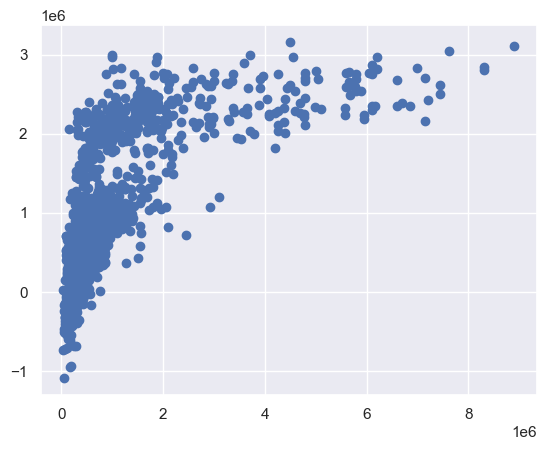

In [94]:
plt.scatter(y_test , y_test_pred)
plt.show()

#### Insights : Not Exactly Linear thats why we get 46 % accuracy by multiple linear regression

### Noramlity of residual

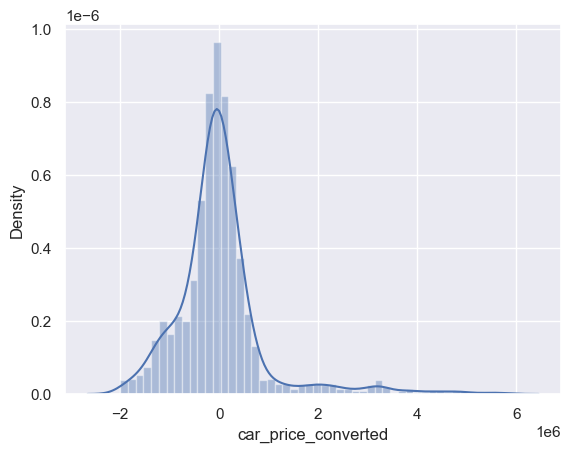

In [95]:
sns.distplot(y_test - y_test_pred)
plt.show()

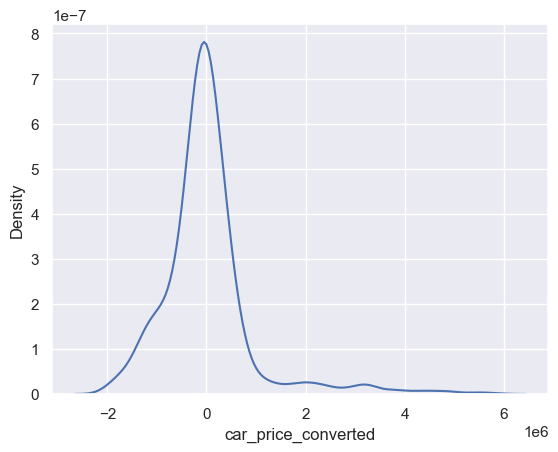

In [96]:
sns.kdeplot(y_test - y_test_pred)
plt.show()

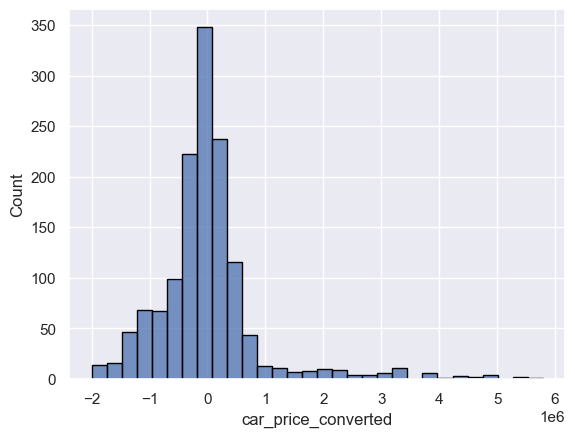

In [97]:
sns.histplot((y_test - y_test_pred),bins = 30 , edgecolor = 'black')
plt.show()

### Regularization

#### Ridge

In [98]:
from sklearn.linear_model import Ridge

In [99]:
ridge = Ridge(alpha = 0.1)

In [100]:
x_train.head(2)

,fuel_type,transmission,ownership,manufacture,model,brand,kms_driven_converted,engine_converted,seats_converted
3693,0,1,1,2014,16,18,50000.0,1248.0,5.0
2851,4,1,1,2013,56,9,110000.0,1582.0,5.0


In [101]:
y_train.head(2)

3693    220000.0
2851    180000.0
Name: car_price_converted, dtype: float64

In [102]:
ridge.fit(x_train , y_train)

Ridge(alpha=0.1)

In [103]:
y_train_pred_ridge = ridge.predict(x_train)

In [104]:
y_train_pred_ridge

array([1045758.83084977,   49276.407487  ,  627820.01475839, ...,
       2595150.9560699 ,  599078.74475107, 2527238.62910959])

In [105]:
r2_score(y_train , y_train_pred_ridge)

0.49063611060544077

#### Training Accuracy of Ridge is 0.49063611060544077

### Gradient Descent

In [106]:
from sklearn.linear_model import SGDRegressor

In [107]:
gdmodel = SGDRegressor()

In [108]:
scaled_x.head(2)

,fuel_type,transmission,ownership,manufacture,model,brand,kms_driven_converted,engine_converted,seats_converted
0,-1.068243,0.625473,-0.599986,0.393228,-0.961147,-0.425853,0.657683,0.731579,-0.348225
1,0.918538,-1.598790,-0.599986,1.411657,-0.864926,1.296126,-1.327744,-0.349299,-0.348225


In [109]:
scaler = StandardScaler()

In [110]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [111]:
x_train_scaled

array([[-1.71910988,  0.61967517, -0.61531122, ..., -0.34130287,
        -0.48515938, -0.35493738],
       [ 0.9304568 ,  0.61967517, -0.61531122, ...,  1.27659214,
         0.08685314, -0.35493738],
       [-1.71910988,  0.61967517, -0.61531122, ...,  1.00694297,
        -1.25926015, -0.35493738],
       ...,
       [-1.05671821, -1.61374869, -0.61531122, ..., -0.44646605,
        -0.76260257, -0.35493738],
       [-1.05671821,  0.61967517,  0.78079009, ...,  0.92604822,
        -0.48515938, -0.35493738],
       [-1.05671821, -1.61374869, -0.61531122, ...,  0.14406563,
        -0.57078999, -0.35493738]])

In [112]:
gdmodel.fit(x_train_scaled , y_train)

SGDRegressor()

In [113]:
y_train_pred_gd = gdmodel.predict(x_train_scaled)

In [114]:
training_accuracy_gd = r2_score(y_train , y_train_pred_gd )

In [115]:
training_accuracy_gd

0.4895810088187771

#### Training Accuracy of SGDRegressor is 0.4900922198824006

In [116]:
gdmodel.fit(x_test_scaled , y_test)

SGDRegressor()

In [117]:
y_test_predict_gd = gdmodel.predict(x_test_scaled)

In [118]:
y_test_predict_gd

array([2255040.44290843,  678273.58289854,  846515.85261583, ...,
       1057123.821591  , 2430724.40567795, -417421.8539384 ])

In [119]:
r2_score(y_test , y_test_predict_gd)

0.46923167395598164

#### Testing Accuracy of SGDRegressor is 0.4694072512686076

In [120]:
from sklearn.model_selection import cross_val_score

In [121]:
cs = cross_val_score(regression , x_train , y_train , cv = 10)

In [122]:
cs

array([0.4585947 , 0.47207166, 0.47633745, 0.4814673 , 0.52140249,
       0.51796987, 0.51921119, 0.44881593, 0.46294914, 0.49252361])

In [123]:
cs.mean()

0.48513433313122156

In [124]:
cs.max()

0.521402485947022

#### Maximum Accuracy of SGDRegressor is 0.521402485947022

### RandomForest

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
rf = RandomForestRegressor(n_estimators = 500)

In [127]:
rf

RandomForestRegressor(n_estimators=500)

In [128]:
rf

RandomForestRegressor(n_estimators=500)

##### Training Model by RandomForestRegressor

In [129]:
rf.fit(x_train , y_train)

RandomForestRegressor(n_estimators=500)

In [130]:
y_train_pred_rf = rf.predict(x_train)

In [131]:
y_train_pred_rf

array([ 248008.,  216318.,  335354., ..., 4528412.,  511942., 2349286.])

#### Training Accuracy of RandomForest model

In [132]:
training_accuracy_rf = r2_score(y_train , y_train_pred_rf)

In [133]:
training_accuracy_rf

0.9834107256807809

#### Training Accuracy of RandomForest model is 0.983586198825709

##### Testing Model by RandomForestRegressor

In [134]:
rf.fit(x_test , y_test)

RandomForestRegressor(n_estimators=500)

In [135]:
y_test_pred_rf = rf.predict(x_test)

In [136]:
y_test_pred_rf

array([5134374.   ,  466414.   ,  774494.   , ..., 1116306.   ,
       2221216.   ,  194079.516])

#### Testing Accuracy of RandomForest model

In [137]:
testing_accuracy_rf = r2_score(y_test , y_test_pred_rf)

In [138]:
testing_accuracy_rf

0.9674123360189428

#### Testing Accuracy of RandomForest model is 0.96763509242282

In [139]:
print('Training Accuracy of RandomForest model:', training_accuracy_rf)
print('Testing Accuracy of RandomForest model:' , testing_accuracy_rf)

Training Accuracy of RandomForest model: 0.9834107256807809
Testing Accuracy of RandomForest model: 0.9674123360189428


#### Insights : Our RandomForest model is most generalised model because we get Training accuracy of randomforest is 98.3586198825709 % and Testing accuracy of randomforest is 96.763509242282 %. we get approximate 2 % variance in train and test accuracy. so thats why we say its most accurate model. because when we get less than 10 % variance in train and test.  

#####  RandomForest is Non parametric algorithm thats why it does not have any assumptions 